In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import zipfile

In [ ]:
with zipfile.ZipFile('/content/archive (4).zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
df = pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


In [ ]:
df.set_index('Date', inplace = True)


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


<Axes: xlabel='Date'>

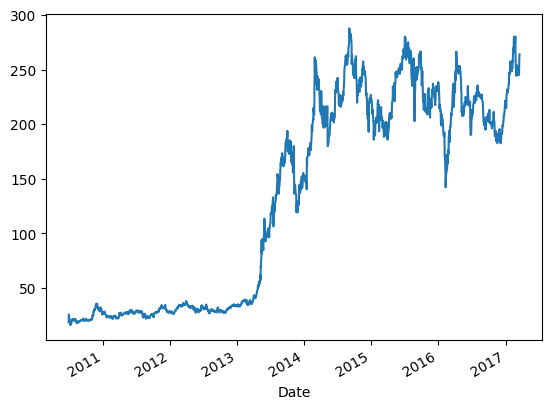

In [ ]:
df['Open'].plot()

<Axes: xlabel='Date'>

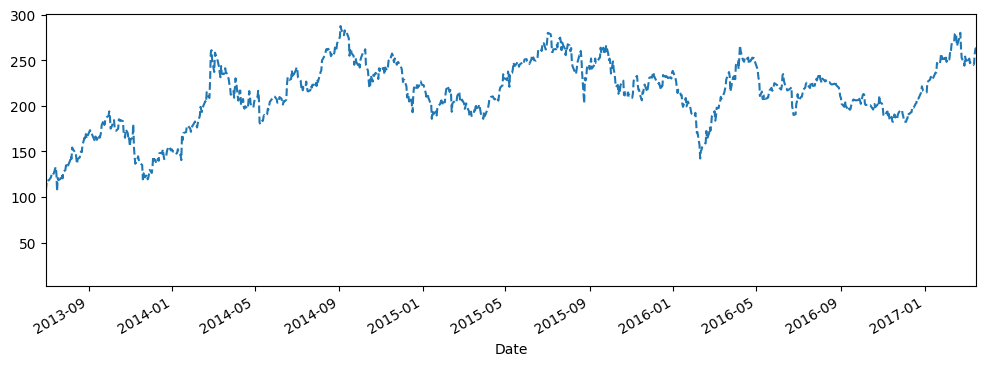

In [ ]:
df['Open'].plot(xlim = ['2013-07-01', '2017-03-17'], figsize =(12,4), ls = '--') #setting list limit

In [ ]:
idx = df.loc['2013-07-01': '2017-03-17'].index
tesla_open= df.loc['2013-07-01': '2017-03-17']['Open']


In [ ]:
tesla_open

,Open
Date,
2014-05-01,207.080002
2014-05-02,208.600006
2014-05-05,209.479996
2014-05-06,216.600006
2014-05-07,209.639999
...,...
2017-03-13,244.820007
2017-03-14,246.110001
2017-03-15,257.000000


In [ ]:
max_open_Tesla = tesla_open.max()
tesla_open.loc[df['Open'] == max_open_Tesla].index[0]

Timestamp('2014-09-03 00:00:00')

In [ ]:
tesla_open.idxmax()

Timestamp('2014-09-03 00:00:00')

In [ ]:
%matplotlib inline

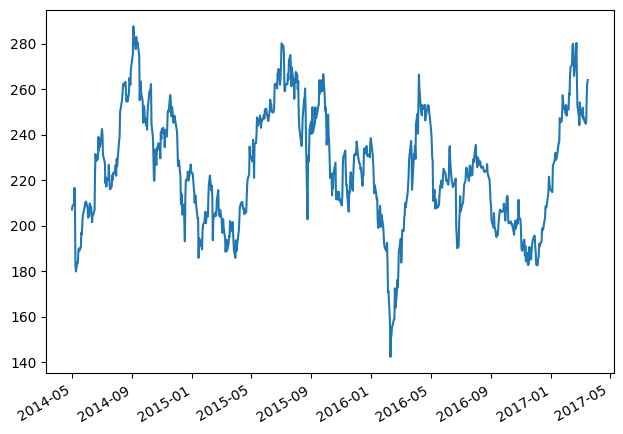

In [ ]:
fig, ax = plt.subplots()
plt.tight_layout()
fig.autofmt_xdate() #prevents overlapping
ax.plot(idx, tesla_open)

In [ ]:
df.resample(rule = 'A').max() #year end frequency

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,35.869999,36.419998,34.750000,35.470001,18766300,35.470001
2011-12-31,34.630001,35.000000,34.029999,34.939999,11517800,34.939999
2012-12-31,38.189999,39.950001,37.110001,38.009998,5680400,38.009998
2013-12-31,193.960007,194.500000,188.369995,193.369995,37163900,193.369995
2014-12-31,287.670013,291.420013,280.399994,286.040009,32681700,286.040009
2015-12-31,280.200012,286.649994,276.299988,282.260010,15649600,282.260010
2016-12-31,266.450012,269.339996,254.509995,265.420013,23742400,265.420013
2017-12-31,280.309998,287.390015,278.609985,280.980011,14867000,280.980011


<Axes: xlabel='Date'>

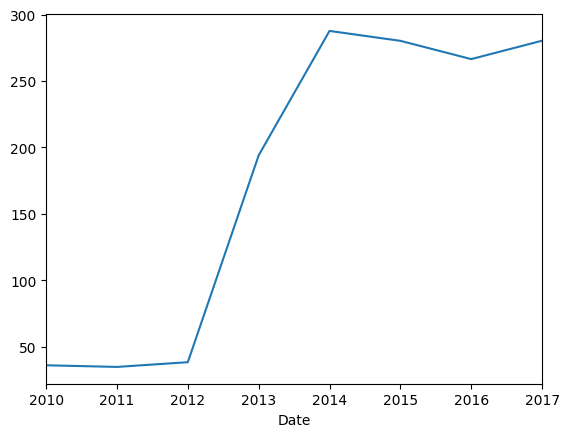

In [ ]:
df.resample(rule = 'A').max()['Open'].plot()

<Axes: xlabel='Date'>

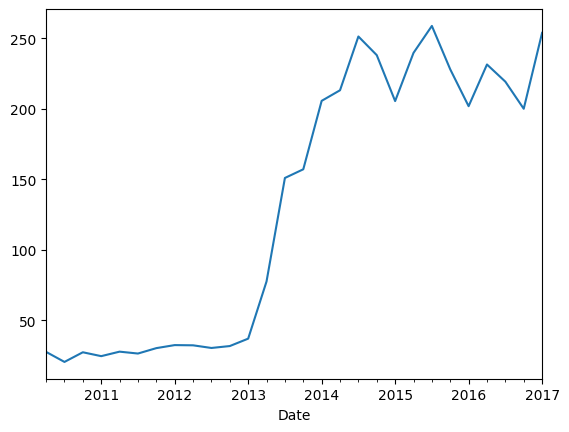

In [ ]:
df.resample(rule = 'QS').mean()['High'].plot()

<Axes: xlabel='Date'>

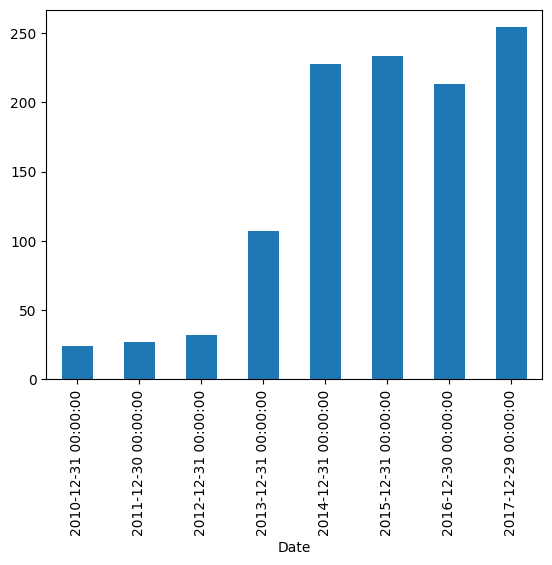

In [ ]:
#business end frequency
df.resample(rule = 'BA').mean()['High'].plot(kind = 'bar')

<Axes: xlabel='Date'>

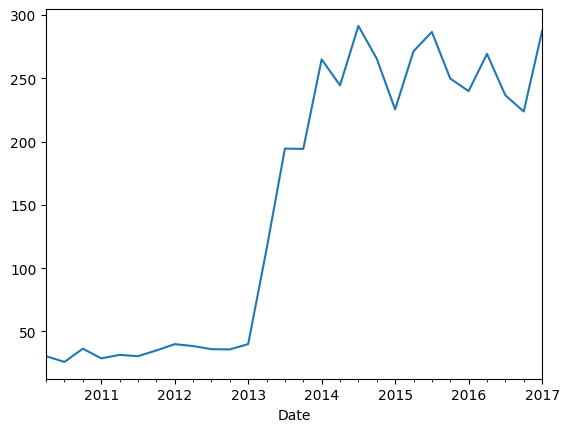

In [ ]:
df.resample(rule = 'BQS').max()['High'].plot()

<Axes: xlabel='Date'>

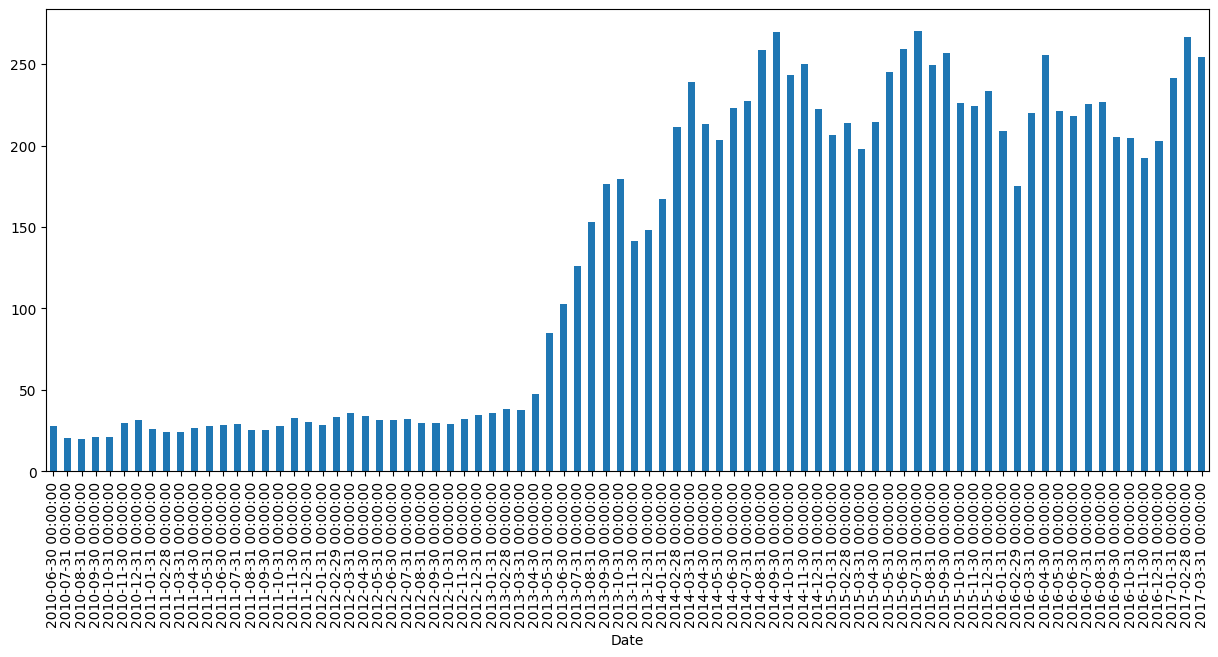

In [ ]:
df.resample(rule = 'M').mean()['High'].plot(kind = 'bar', figsize=(15,6))

In [ ]:
df['Adj Close:30 day rolling'] = df['Adj Close'].rolling(window =30, min_periods=1 ).mean()
df['Adj Close:10 day rolling'] = df['Adj Close'].rolling(window =10, min_periods=1 ).mean()
df['Adj Close:50 day rolling'] = df['Adj Close'].rolling(window =50, min_periods=1 ).mean()

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,30 day rolling,Adj Close:30 day rolling
Date,,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,NaN,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,NaN,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,NaN,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,NaN,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,NaN,20.998000


<Axes: xlabel='Date'>

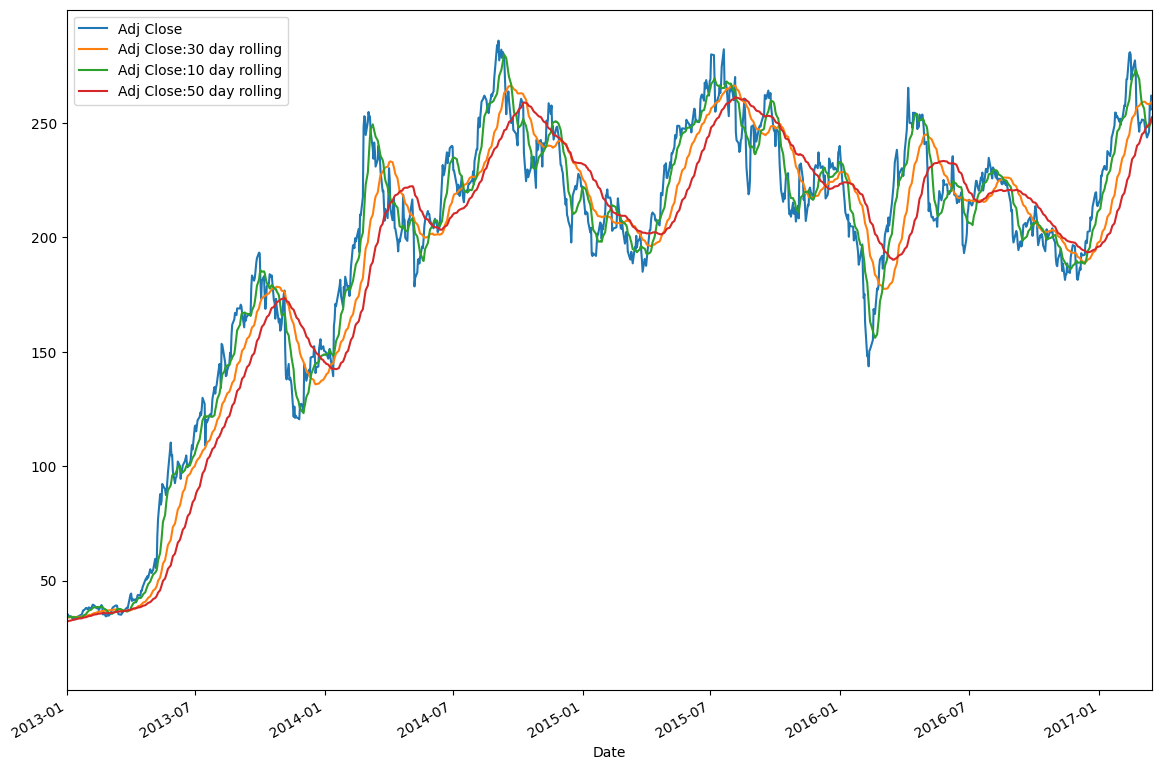

In [ ]:
df[['Adj Close', 'Adj Close:30 day rolling', 'Adj Close:10 day rolling', 'Adj Close:50 day rolling']].plot(xlim = ['2013-01-01', '2017-03-17'],figsize = (14, 10))


same weightage to all day data

#CMA: Cumulative MA

<Axes: xlabel='Date'>

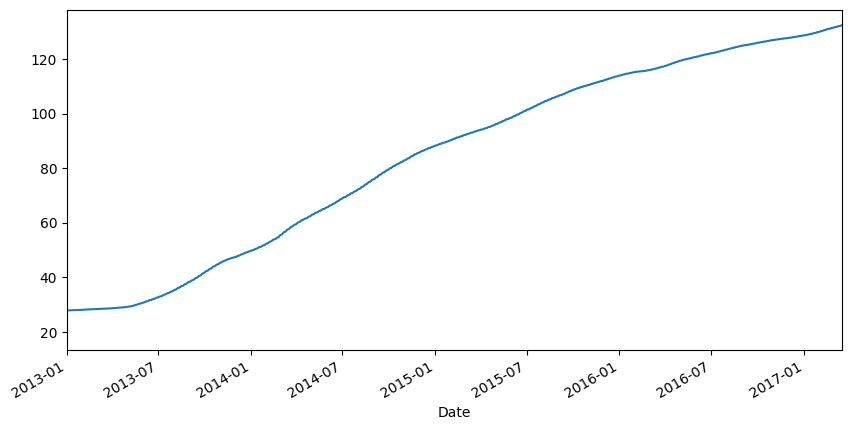

In [ ]:
df['Adj Close'].expanding().mean().plot(xlim = ['2013-01-01', '2017-03-17'], figsize =(10, 5))

In [ ]:
#EWMA - Exponential Weight MA
#foucs on incoming data with more weight on recent data
df['ewma for 5 days']= df['Adj Close'].ewm(span = 5).mean()
df['ewma for 15 days']= df['Adj Close'].ewm(span = 15).mean()

<Axes: >

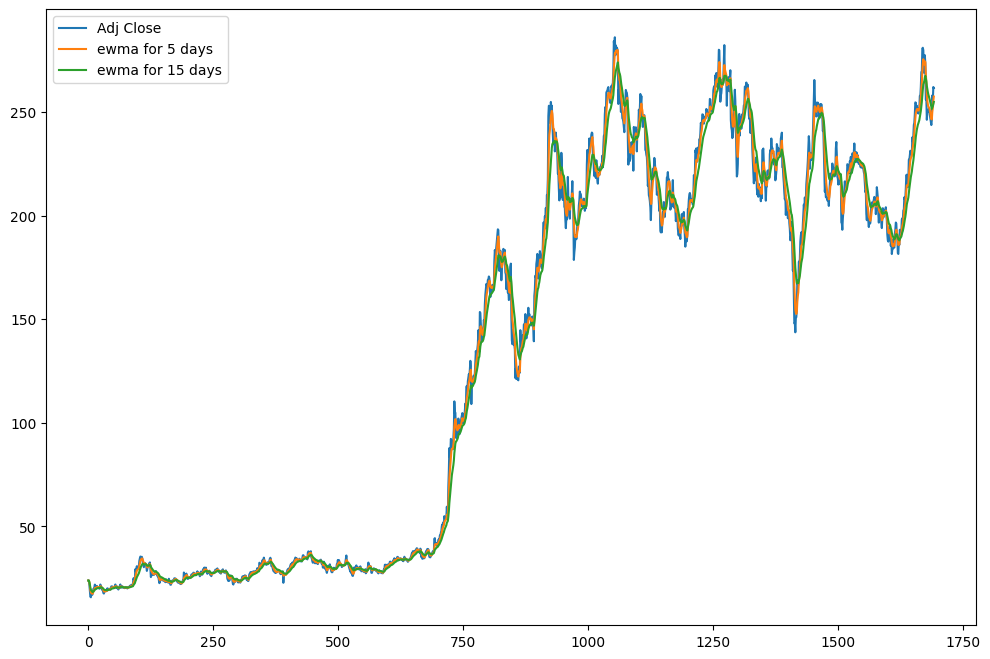

In [ ]:
df[['Adj Close','ewma for 5 days','ewma for 15 days']].plot(figsize =(12,8))

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
tesla_open_df = tesla_open.to_frame()
tesla_open_df

,Open
Date,
2014-05-01,207.080002
2014-05-02,208.600006
2014-05-05,209.479996
2014-05-06,216.600006
2014-05-07,209.639999
...,...
2017-03-13,244.820007
2017-03-14,246.110001
2017-03-15,257.000000


<Axes: ylabel='Frequency'>

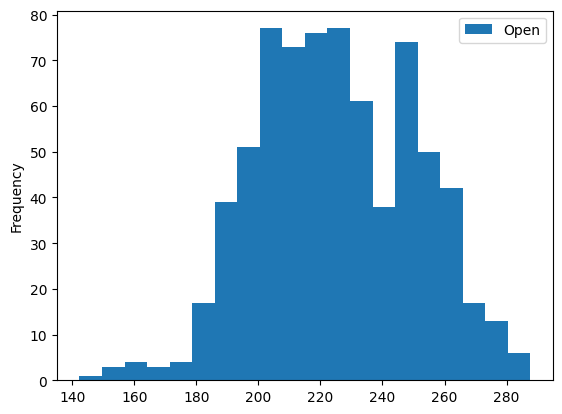

In [ ]:
tesla_open_df.plot(kind = 'hist', bins = 20)

In [ ]:
#from pmdarima.arima import auto_arima

In [ ]:
#!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00


Checking for stationary

In [ ]:
def adfuller_hypothesis(stock):
  result = adfuller(stock)
#  label = ['ADF T-test', 'p-value','no_of. lags', '# of observation']
#  for key, label in zip(result, label):
 #   print(label + ': ' + str(key))
  print('ADF T-test: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] < 0.05:
    print('null hypothesis is rejected, stationary as have no unit root')
  else:
    print('null hypotheis not rejected, not stationary AS have unit root')



In [ ]:
adfuller_hypothesis(df['Open'])

ADF T-test: -0.8181928810104885
p-value: 0.8137195490650421
null hypotheis not rejected, not stationary AS have unit root


In [ ]:
df['First Difference'] = df['Open'] - df['Open'].shift(1)
df['First Difference']

,First Difference
Date,
2010-06-29,NaN
2010-06-30,6.790001
2010-07-01,-0.790001
2010-07-02,-2.000000
2010-07-06,-3.000000
...,...
2017-03-13,-1.390000
2017-03-14,1.289994
2017-03-15,10.889999


In [ ]:
adfuller_hypothesis(df['First Difference'].dropna())

ADF T-test: -42.725246913032166
p-value: 0.0
null hypothesis is rejected, stationary as have no unit root


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import statsmodels.api as sm


AR best identified with pacf(p)

MA best identified with acf(q)

d is differencing

need to know p,d,q:

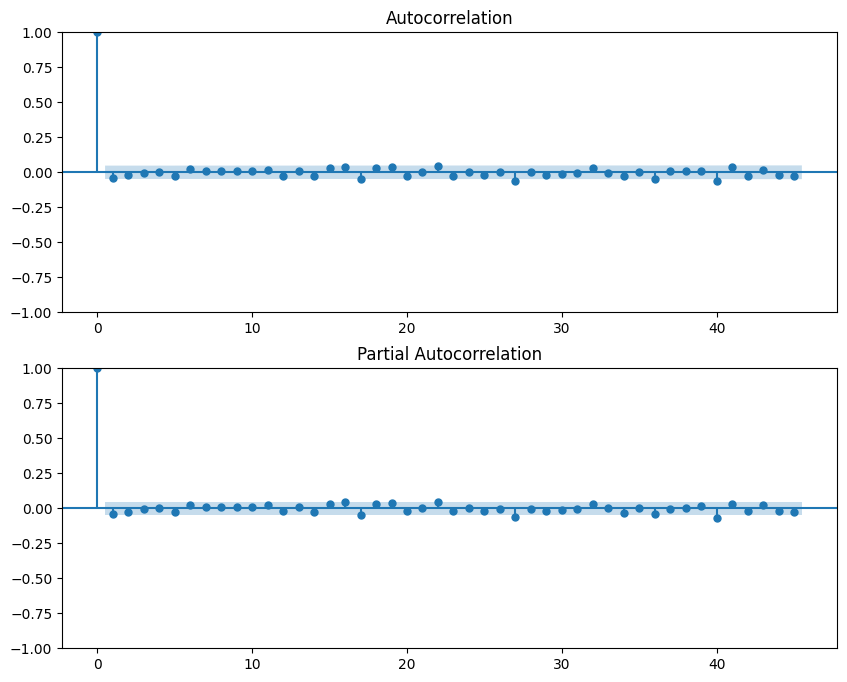

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df['Close First difference'].iloc[1:], lags =40,ax = ax1)
fig = sm.graphics.tsa.plot_acf(df['First Difference'].dropna(),ax = ax1, lags = 45)
ax2 =fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df['Close First difference'].iloc[1:], lags =40,ax = ax2)
fig = sm.graphics.tsa.plot_pacf(df['First Difference'].dropna(), ax = ax2,lags = 45)

q = 1, p = 1, d =1

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

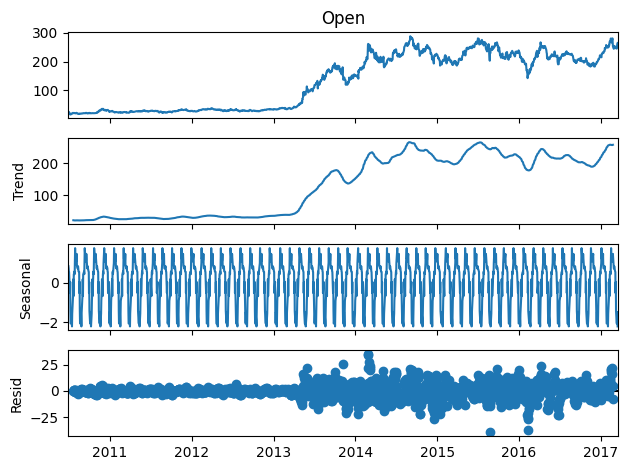

In [ ]:
decompose = seasonal_decompose(df['Open'], model = 'additive', period = 30)
decompose.plot()
plt.show()

In [ ]:
df

,Open,High,Low,Close,Volume,Adj Close,First Difference
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,6.790001
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,-0.790001
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,-2.000000
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,-3.000000
...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,-1.390000
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,1.289994
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,10.889999


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2016,3,1)
test_dataset_end=datetime(2017,3,17)

In [ ]:
print(train_dataset_end)
print(test_dataset_end)

2016-03-01 00:00:00
2017-03-17 00:00:00


In [ ]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
train_data

,Open,High,Low,Close,Volume,Adj Close,First Difference
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,6.790001
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,-0.790001
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,-2.000000
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,-3.000000
...,...,...,...,...,...,...,...
2016-02-24,172.750000,179.500000,167.839996,179.000000,5395600,179.000000,-3.410004
2016-02-25,178.649994,188.520004,175.199997,187.429993,5750700,187.429993,5.899994
2016-02-26,188.699997,192.000000,185.000000,190.339996,6065100,190.339996,10.050003


In [ ]:
test_data

,Open,High,Low,Close,Volume,Adj Close,First Difference
Date,,,,,,,
2016-03-02,183.729996,188.520004,181.500000,188.339996,4862400,188.339996,-10.520004
2016-03-03,188.279999,197.419998,184.220001,195.740005,4829000,195.740005,4.550003
2016-03-04,198.000000,204.029999,197.500000,201.039993,6489100,201.039993,9.720001
2016-03-07,197.679993,209.699997,197.399994,205.289993,5329400,205.289993,-0.320007
2016-03-08,203.500000,207.500000,202.199997,202.600006,4178700,202.600006,5.820007
...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,-1.390000
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,1.289994
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,10.889999


In [ ]:
print(test_data.index)

DatetimeIndex(['2016-03-02', '2016-03-03', '2016-03-04', '2016-03-07',
               '2016-03-08', '2016-03-09', '2016-03-10', '2016-03-11',
               '2016-03-14', '2016-03-15',
               ...
               '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17'],
              dtype='datetime64[ns]', name='Date', length=264, freq=None)


In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
print(pred_start_date)
print(pred_end_date)

2016-03-02 00:00:00
2017-03-17 00:00:00


In [ ]:
model = ARIMA(train_data['Open'], order = (1, 1, 1))
model_fit =model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1428
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4203.083
Date:                Fri, 23 Aug 2024   AIC                           8412.165
Time:                        06:43:53   BIC                           8427.955
Sample:                             0   HQIC                          8418.062
                               - 1428                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4949      0.219      2.258      0.024       0.065       0.924
ma.L1         -0.5430      0.215     -2.525      0.012      -0.964      -0.122
sigma2        21.1769      0.345     61.396      0.0

In [ ]:
pred = model_fit.predict(steps = 264)

In [ ]:
pred

,predicted_mean
Date,
2010-06-29,0.000000
2010-06-30,18.999981
2010-07-01,25.474856
2010-07-02,24.866617
2010-07-06,23.023440
...,...
2016-02-24,175.709554
2016-02-25,172.669316
2016-02-26,178.322580


In [ ]:
residuals = train_data['Open'] - pred

In [ ]:
residuals

,0
Date,
2010-06-29,19.000000
2010-06-30,6.790020
2010-07-01,-0.474856
2010-07-02,-1.866617
2010-07-06,-3.023440
...,...
2016-02-24,-2.959554
2016-02-25,5.980678
2016-02-26,10.377417


In [ ]:
#residuals_df = pd.DataFrame(residuals, columns = ['residuals'])
#residuals_df

,residuals
0,-6.617608
1,-10.313031
2,-4.203088
3,-10.652364
4,-11.247858
...,...
130,19.266204
131,20.556098
132,31.446005
133,36.845915


<Axes: ylabel='Density'>

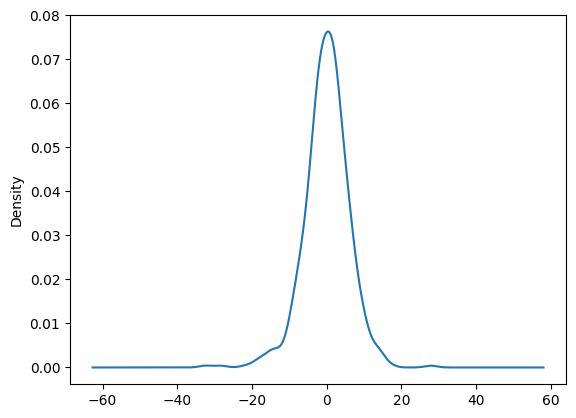

In [ ]:
#model_fit.resid.plot(kind = 'kde')

In [ ]:
#test_data.loc[pred_start_date:pred_end_date, 'Predicted_ARIMA']=pred

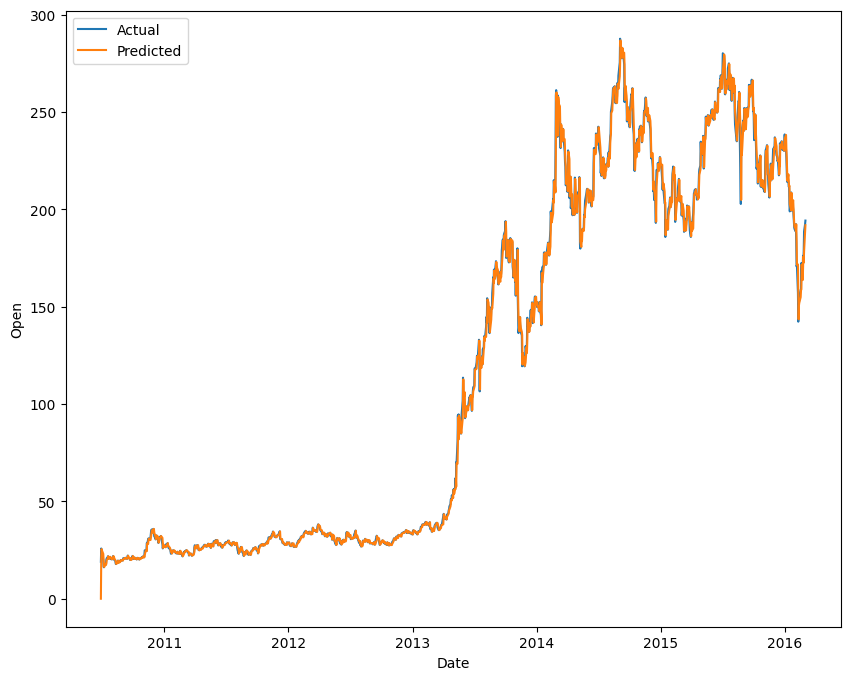

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(train_data['Open'], label = 'Actual')
plt.plot(pred, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend(loc = 'upper left')
plt.show()